In [117]:
import csv
import pandas as pd
import os

In [1]:
def get_csv(path):
    '''
    Read in a csv and convert to Pandas Dataframe
    
    :params
    :path - string of full file path of the csv
    :return - Pandas Dataframe of csv
    '''
    df = pd.read_csv(path)
    return df

In [119]:
# Import all the csv data of the three years into Pandas for analysis
file_names = ['2015.csv', '2016.csv', '2017.csv']
dfs = []

for file_ in file_names:
    df = get_csv(os.getcwd()+'/'+file_)
    # Add a column for year
    df['Year'] = file_[:4]
    # Remove "Happiness Rank" since it is not in all of the data and is apparent by the order of the countries
    if 'Happiness Rank' in df.columns:
        del df["Happiness Rank"]
    dfs.append(df)

df = pd.concat(dfs)

In [120]:
print("Dimensions: {:>3}".format(df.shape))
df.head()

Dimensions: (470, 16)


,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Upper Confidence Interval,Whisker-high,Whisker-low,Year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,2015


In [121]:
df.tail()

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Upper Confidence Interval,Whisker-high,Whisker-low,Year
150,Rwanda,0.540,0.369,0.946,0.582,0.253,3.471,0.326,NaN,NaN,NaN,0.455,NaN,3.543,3.399,2017
151,Syria,1.062,0.777,0.396,0.082,0.494,3.462,0.501,NaN,NaN,NaN,0.151,NaN,3.664,3.260,2017
152,Tanzania,0.621,0.511,1.042,0.390,0.354,3.349,0.365,NaN,NaN,NaN,0.066,NaN,3.461,3.237,2017
153,Burundi,1.683,0.092,0.630,0.060,0.204,2.905,0.152,NaN,NaN,NaN,0.084,NaN,3.075,2.735,2017
154,Central African Republic,2.066,0.000,0.000,0.271,0.281,2.693,0.019,NaN,NaN,NaN,0.057,NaN,2.865,2.521,2017


In [122]:
# Find out which countries have happiness score for all three years (2015, 2016, 2017)
country_2015 = df[df["Year"]=="2015"]["Country"].unique()
country_2016 = df[df["Year"]=="2016"]["Country"].unique()
country_2017 = df[df["Year"]=="2017"]["Country"].unique()

print("Number of countries with happiness score in 2015: {}".format(len(country_2015)))
print("Number of countries with happiness score in 2016: {}".format(len(country_2016)))
print("Number of countries with happiness score in 2017: {}".format(len(country_2017)))

Number of countries with happiness score in 2015: 158
Number of countries with happiness score in 2016: 157
Number of countries with happiness score in 2017: 155


In [123]:
# Keep only those countries in the df

inter_countries = []
for country in country_2017:
    if (country in country_2016) and (country in country_2015):
        inter_countries.append(country)

df = df.loc[df["Country"].isin(inter_countries)]

In [124]:
# Create a lookup table to map regions
region_lookup = df[df['Year'] == "2015"][["Country", "Region"]].set_index("Country")
region_lookup_dict = region_lookup.to_dict()["Region"]

In [125]:
# Map missing regions to countries
missing_regions_before = df["Region"].isnull().sum()

df["Region"] = df["Country"].map(region_lookup_dict)

missing_regions_after = df["Region"].isnull().sum()

# Show regions numbers
print("Number of missing regions initially: {:>3}\nNumber of missing regions now: {:>3}".format(missing_regions_before, missing_regions_after))

Number of missing regions initially: 146
Number of missing regions now:   0


In [127]:
# Delete all statistical confidence columns not used in this visualization
del df["Lower Confidence Interval"]
del df["Standard Error"]
del df["Upper Confidence Interval"]
del df["Whisker-high"]
del df["Whisker-low"]

In [128]:
# Final data
df.head()

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Region,Trust (Government Corruption),Year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,7.587,0.94143,Western Europe,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,7.561,0.94784,Western Europe,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,7.527,0.87464,Western Europe,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,7.522,0.88521,Western Europe,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,7.427,0.90563,North America,0.32957,2015


In [132]:
# Export to csv for checkpoint
path = os.getcwd()+"/cleaned.csv"
df.to_csv(path, index=False)

## Checkpoint
Resume from here

In [2]:
import os, csv, pandas as pd, seaborn, json
from ggplot import *
from pprint import pprint

path = os.getcwd()+"/cleaned.csv"
df = get_csv(path)
df["Year"] = pd.to_datetime(df["Year"], format="%Y").dt.year

In [3]:
df.tail()

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Region,Trust (Government Corruption),Year
433,Togo,1.837,0.305,0.432,0.380,0.197,3.495,0.247,Sub-Saharan Africa,0.096,2017
434,Rwanda,0.540,0.369,0.946,0.582,0.253,3.471,0.326,Sub-Saharan Africa,0.455,2017
435,Syria,1.062,0.777,0.396,0.082,0.494,3.462,0.501,Middle East and Northern Africa,0.151,2017
436,Tanzania,0.621,0.511,1.042,0.390,0.354,3.349,0.365,Sub-Saharan Africa,0.066,2017
437,Burundi,1.683,0.092,0.630,0.060,0.204,2.905,0.152,Sub-Saharan Africa,0.084,2017


In [134]:
# Find correlations in data to explore

df.corr()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
Dystopia Residual,1.000000,0.094236,-0.049483,0.034969,-0.108899,0.522916,0.135361,0.012158,-0.179494
Economy (GDP per Capita),0.094236,1.000000,0.573964,0.363284,-0.005028,0.795575,0.776308,0.358406,0.143328
Family,-0.049483,0.573964,1.000000,0.455845,0.088621,0.637791,0.470235,0.188671,0.266495
Freedom,0.034969,0.363284,0.455845,1.000000,0.351183,0.568934,0.381546,0.493607,-0.050838
Generosity,-0.108899,-0.005028,0.088621,0.351183,1.000000,0.173764,0.074181,0.264460,0.033869
Happiness Score,0.522916,0.795575,0.637791,0.568934,0.173764,1.000000,0.758367,0.437157,-0.000353
Health (Life Expectancy),0.135361,0.776308,0.470235,0.381546,0.074181,0.758367,1.000000,0.294086,-0.143107
Trust (Government Corruption),0.012158,0.358406,0.188671,0.493607,0.264460,0.437157,0.294086,1.000000,-0.061814
Year,-0.179494,0.143328,0.266495,-0.050838,0.033869,-0.000353,-0.143107,-0.061814,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 11 columns):
Country                          438 non-null object
Dystopia Residual                438 non-null float64
Economy (GDP per Capita)         438 non-null float64
Family                           438 non-null float64
Freedom                          438 non-null float64
Generosity                       438 non-null float64
Happiness Score                  438 non-null float64
Health (Life Expectancy)         438 non-null float64
Region                           438 non-null object
Trust (Government Corruption)    438 non-null float64
Year                             438 non-null int64
dtypes: float64(8), int64(1), object(2)
memory usage: 37.7+ KB


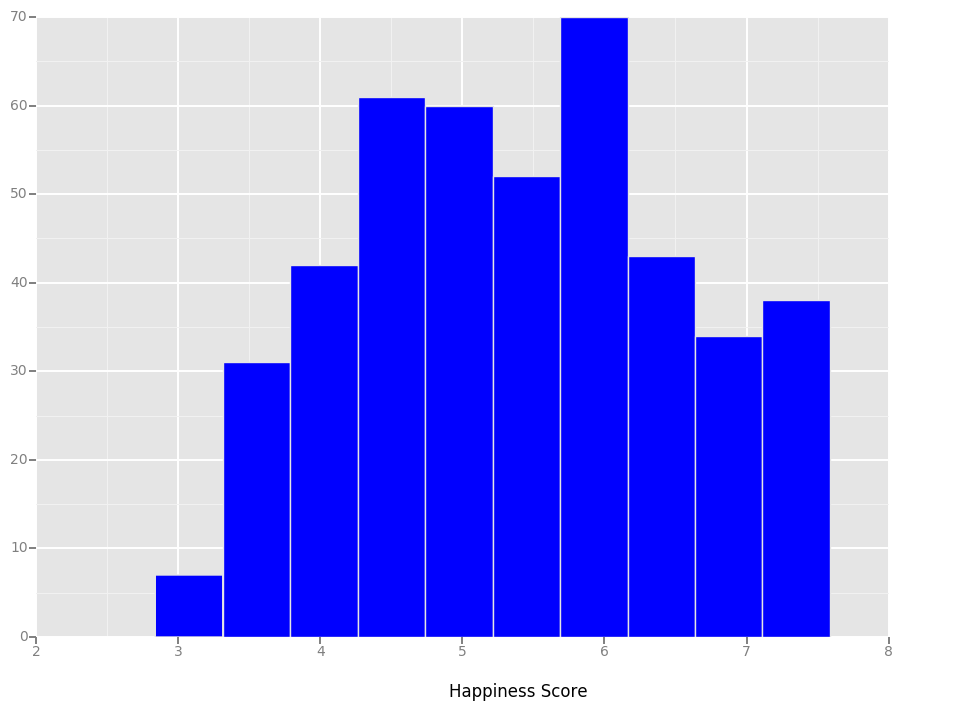

<ggplot: (285098985)>

In [148]:
# Explore data with graphs

ggplot(aes(x="Happiness Score"), data=df)+\
      geom_histogram(binwidth=1, fill='blue')

In [191]:
top_10 = []
top_10.append(df[df["Year"]==2015].head(10))
top_10.append(df[df["Year"]==2016].head(10))
top_10.append(df[df["Year"]==2017].head(10))

df_t10 = pd.concat(top_10)

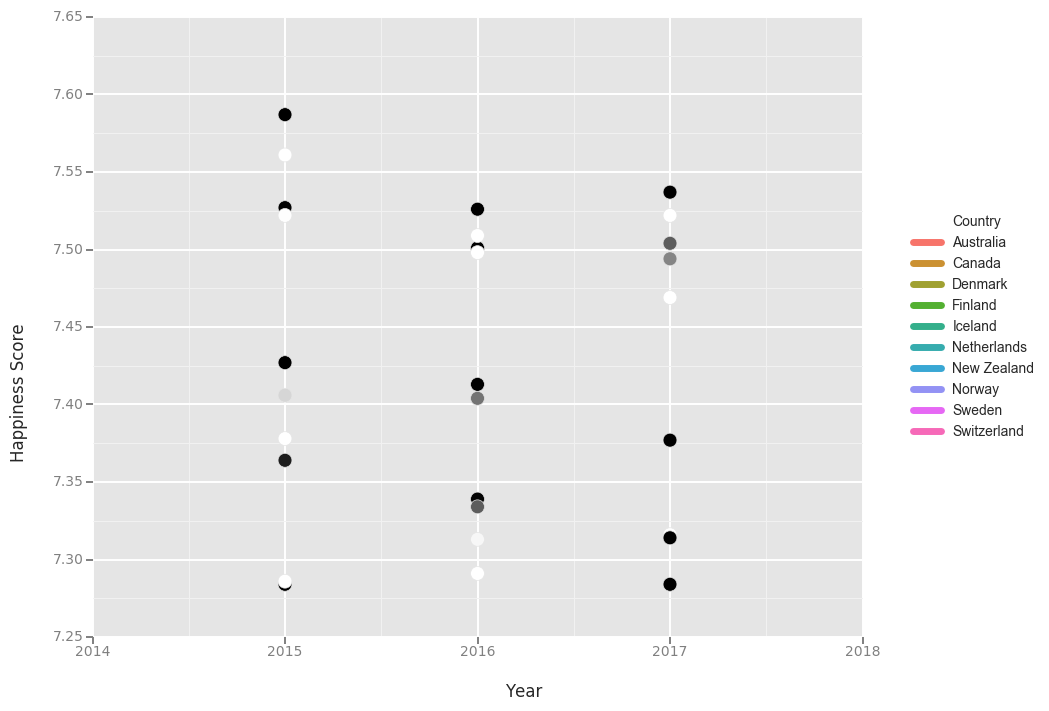

<ggplot: (294974221)>

In [196]:
ggplot(aes(x='Year', y='Happiness Score', color="Country"), data=df_t10)+\
        geom_point(size=100)+\
    scale_x_continuous(breaks=[2014,2015,2016,2017,2018], labels=["2014","2015", "2016", "2017","2018"])

In [5]:
# parse data into json for visualization

schema = [
    {"year1: happiness_score1",
     "year2: happiness_score2",
     "country1: name1"
    },
    {"year1: happiness_score1",
     "year2: happiness_score2",
     "country2: name2"
    }
]

with open(path, 'rb') as f:
    reader = csv.DictReader(f)
    data = list(reader)

In [9]:
data_json={}

for entry in data:
    for k,v in entry.items():
        if k == "Country":
            country = v
        if k == "Happiness Score":
            happiness = v
        if k == "Year":
            year = v
    if country not in data_json:
        data_json[country] = {year:happiness}
    else:
        data_json[country].update({year:happiness})

export_json = []
for country in sorted(list(data_json.keys())):
    data_json[country].update({"country": country})
    export_json.append(data_json[country])

In [10]:
with open('data.json', 'w') as js:
    json.dump(export_json, js, indent=4, sort_keys=True)